# Учимся работе с данными - от загрузки до моделирования

## Цель:
В этом домашнем задании вам предстоит поработать с достаточно небольшим, но интересным датасетом по раку груди. Признаками в этом наборе данных являются различные измерения образований в груди, такие как радиус, симметричность и т.д. Целевая переменная — диагноз, является ли новообразование злокачественным или нет.


## Описание/Пошаговая инструкция выполнения домашнего задания:
### Часть 1. EDA


Скачайте датасет по ссылке: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
Посмотрите на базовые статистики датасета: средние, медианы и т.д.
Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.
Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?
Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?
Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :)


### Часть 2. Моделирование при помощи kNN


Разбейте данные на train-test, отложив 30% выборки для тестирования.

Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

Постройте модель kNN «из коробки» без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)


Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:


Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.

Постройте модель логистической регрессии «из коробки» без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)


Какая из двух настроенных моделей, kNN или логистическая регрессия, оказалась в итоге лучше?


## Критерии оценки:
Домашнее задание принимается, если выполнены следующие действия:

EDA с базовыми визуализациями, scatterplot-ами и boxplot-ами.
Предобработка датасета для обучения модели.
Обучение k-NN, проверка качества и настройка гиперпараметров.

# Решение

## Загрузка данных

In [1]:
import pandas as pd

# Загрузка датасета
df = pd.read_csv("data.csv")

# Просмотр первых строк
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Базовая статистика

In [2]:
# Основная информация
df.info()

# Описательная статистика
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Распределения признаков по целевой переменной

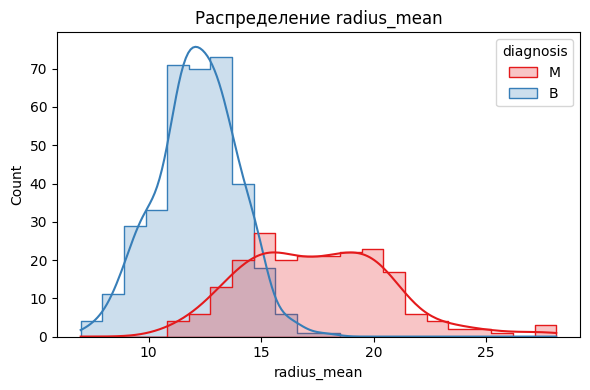

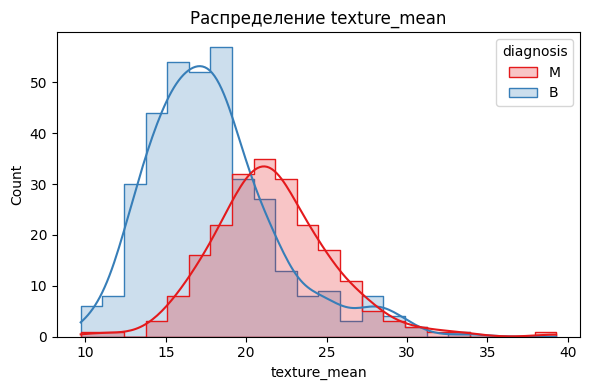

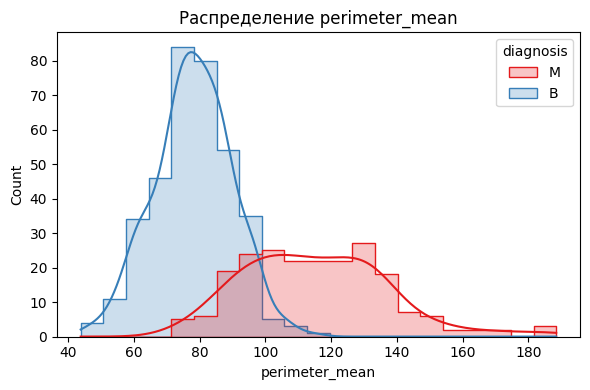

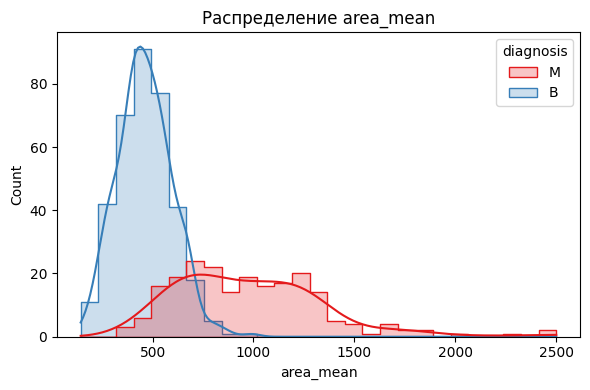

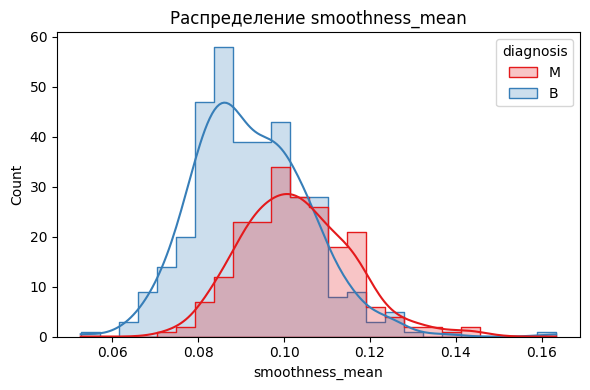

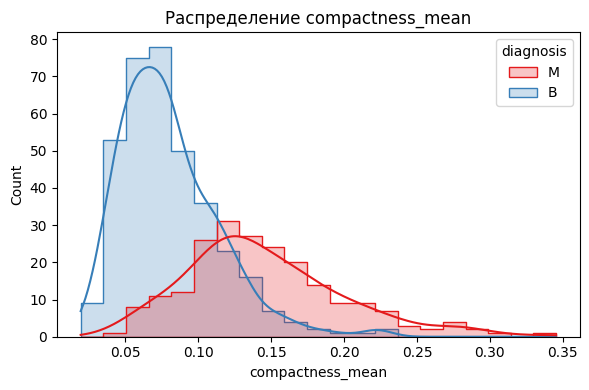

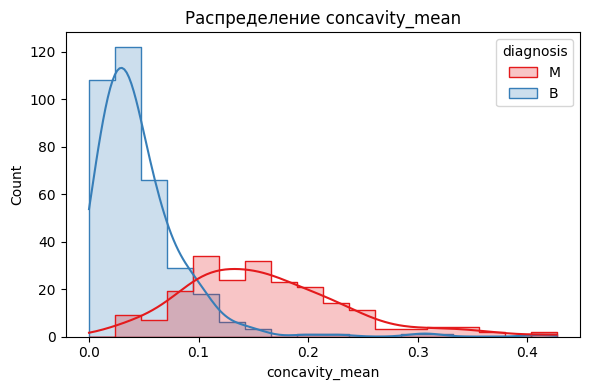

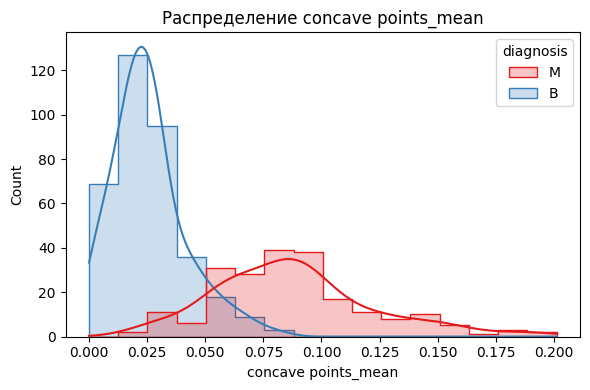

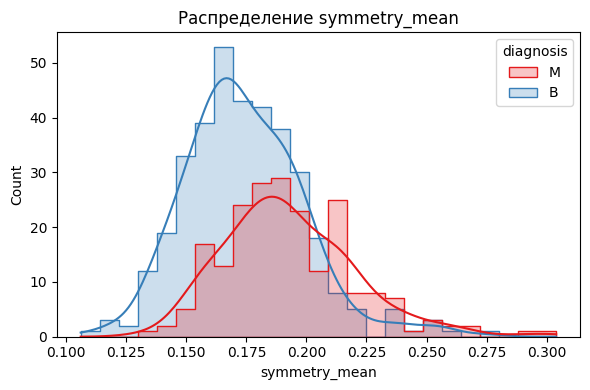

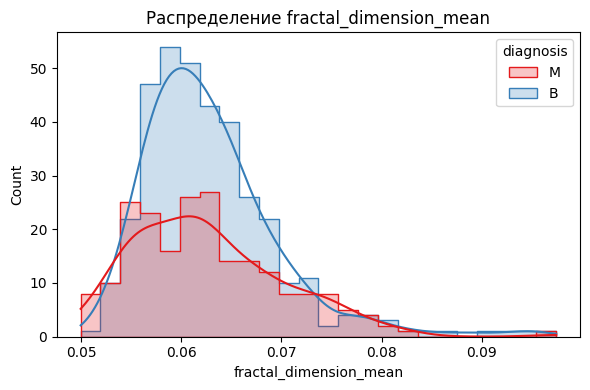

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Целевая переменная — diagnosis
for col in df.columns[2:12]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='diagnosis', kde=True, palette='Set1', element='step')
    plt.title(f"Распределение {col}")
    plt.tight_layout()
    plt.show()


## Матрица корреляций и тепловая карта

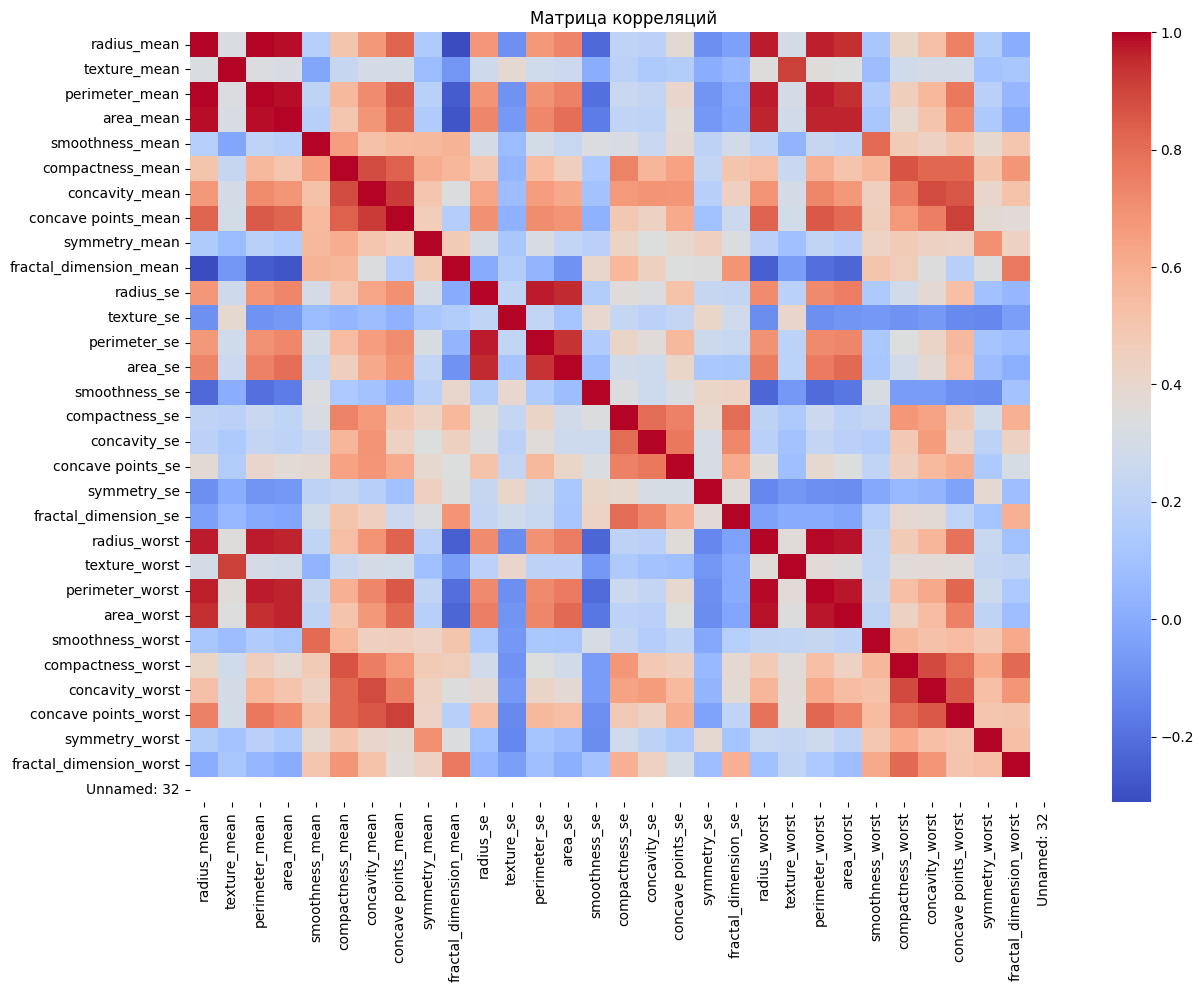

In [5]:
plt.figure(figsize=(14, 10))
corr = df.iloc[:, 2:].corr()  # исключаем id и diagnosis
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()


## Сильно коррелированные признаки и scatterplots

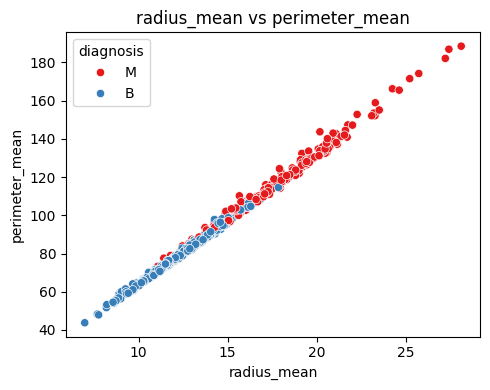

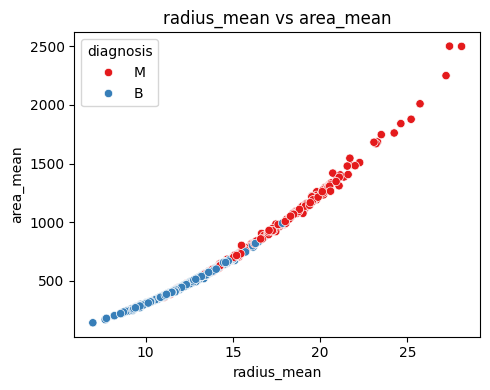

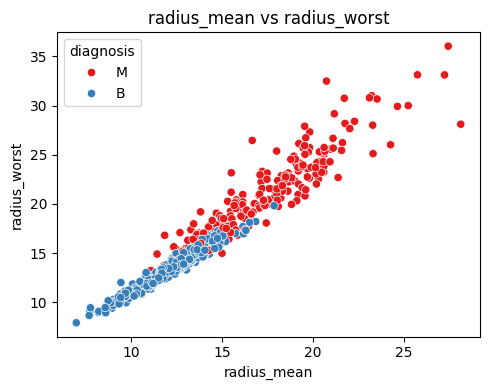

In [6]:
# Найдём пары с корреляцией > 0.85
high_corr_pairs = [(i, j) for i in corr.columns for j in corr.columns 
                   if i != j and abs(corr.loc[i, j]) > 0.85]

# Нарисуем scatterplots для первых 3 пар
for i, (x, y) in enumerate(high_corr_pairs[:3]):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=df, x=x, y=y, hue='diagnosis', palette='Set1')
    plt.title(f"{x} vs {y}")
    plt.tight_layout()
    plt.show()


## Boxplots по целевой переменной

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


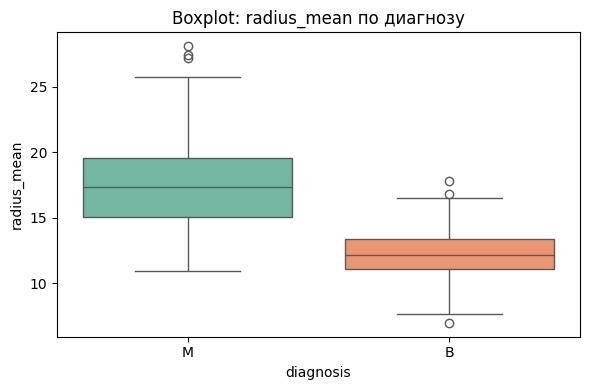

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


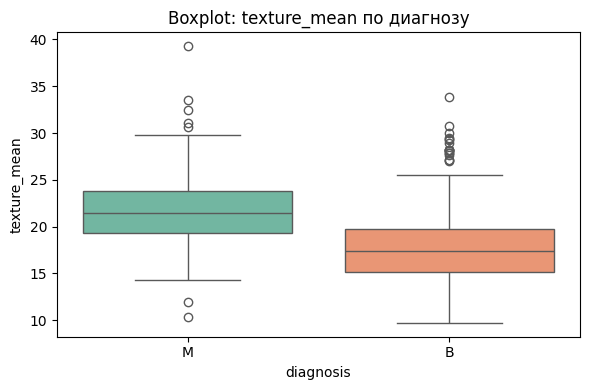

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


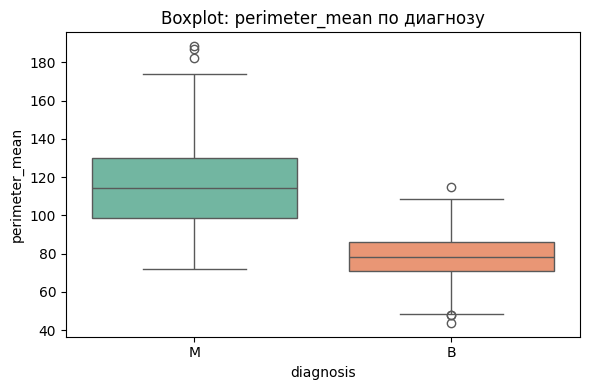

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


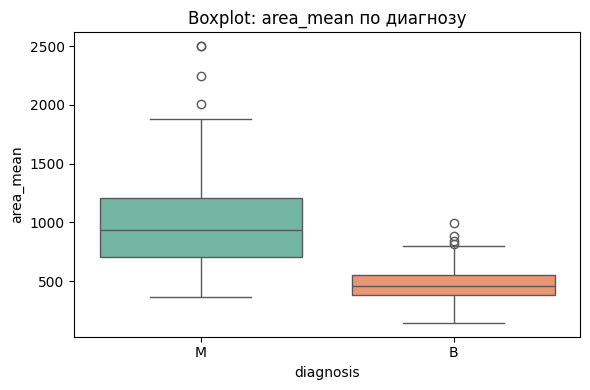

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


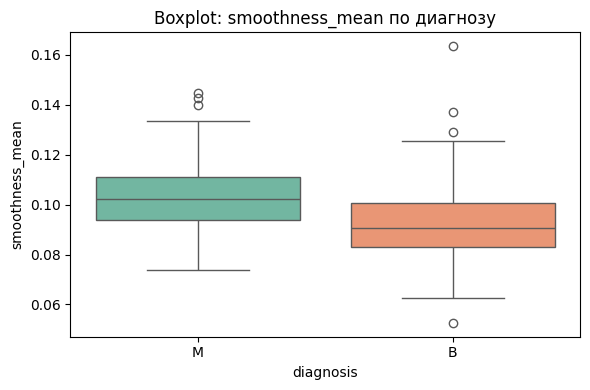

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


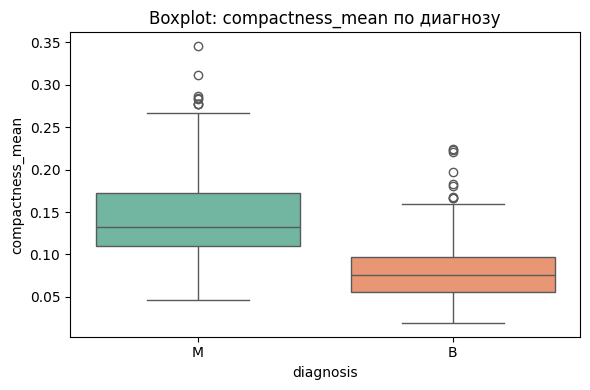

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


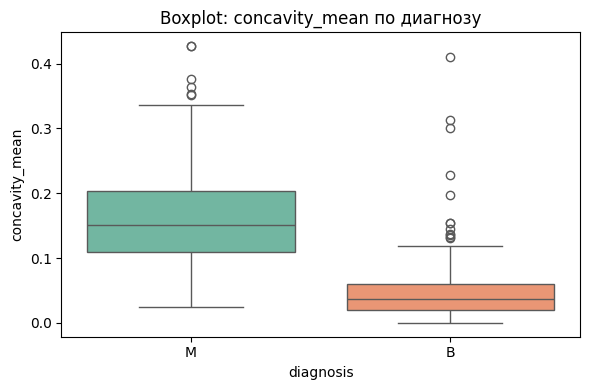

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


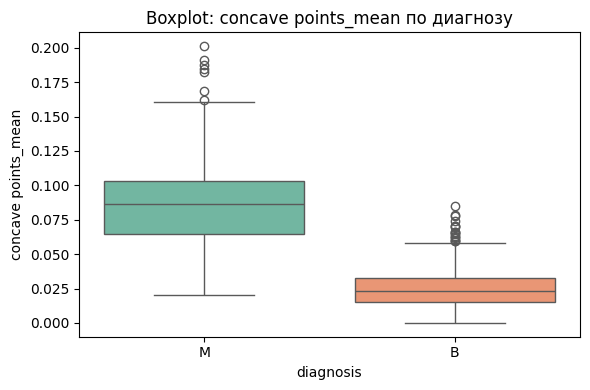

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


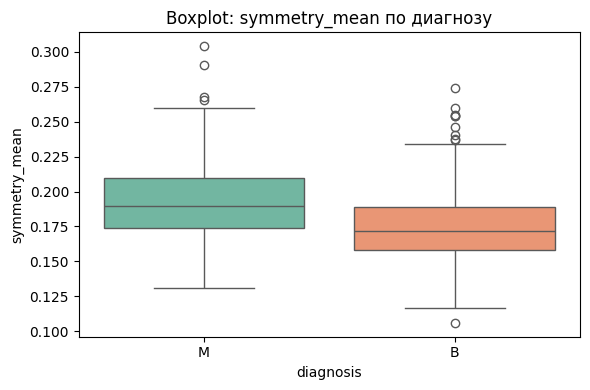

/var/folders/0l/vmcrfv9x3v57vqgjl6wd2psm0000gn/T/ipykernel_93234/2143148016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')


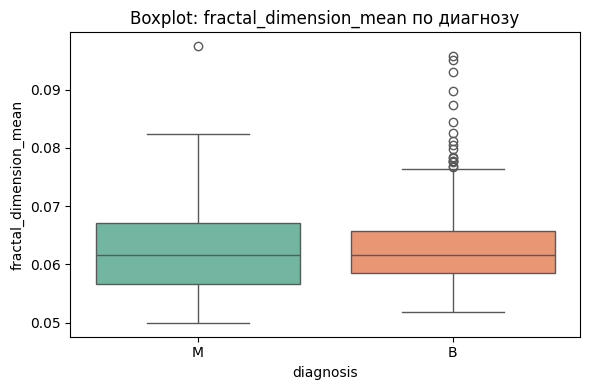

In [7]:
for col in df.columns[2:12]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')
    plt.title(f"Boxplot: {col} по диагнозу")
    plt.tight_layout()
    plt.show()


## Моделирование при помощи kNN

### Разделение на train и test

In [9]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 976.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 873.5 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split

# Удаляем ненужные столбцы
df_model = df.drop(columns=['id', 'Unnamed: 32'])  
df_model['diagnosis'] = df_model['diagnosis'].map({'M': 1, 'B': 0})  # бинаризация

# Разделяем на признаки и целевую переменную
X = df_model.drop(columns='diagnosis')
y = df_model['diagnosis']

# Делим на тренировочную и тестовую выборки (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Стандартизация признаков

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### kNN "из коробки" + метрики

Accuracy: 0.9590643274853801
Precision: 0.9516129032258065
Recall: 0.9365079365079365
F1 Score: 0.944
ROC AUC: 0.9786890064667844


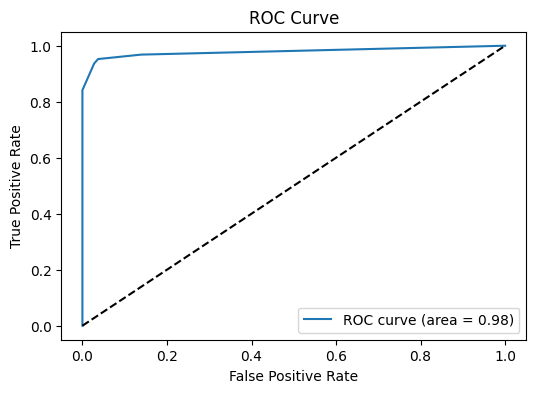

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Обучение
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Метрики
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Настройка числа соседей (гиперпараметр k) на кросс-валидации

Best k: 3
F1 Score (best k): 0.944
ROC AUC (best k): 0.9763374485596708


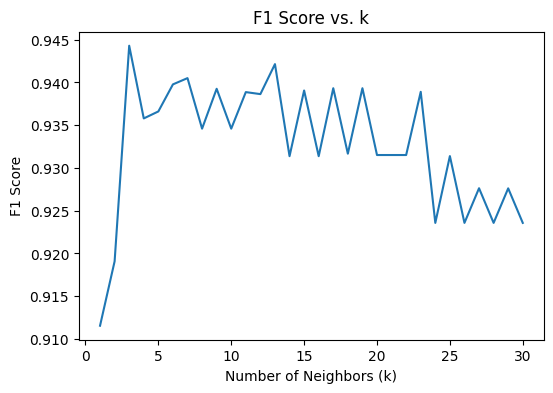

In [13]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 31)
cv_scores = []

# Оценка качества на кросс-валидации
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
    cv_scores.append(scores.mean())

# Лучшая модель
best_k = k_range[np.argmax(cv_scores)]
print("Best k:", best_k)

# Финальная модель
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)
y_proba_best = knn_best.predict_proba(X_test_scaled)[:, 1]

# Метрики
print("F1 Score (best k):", f1_score(y_test, y_pred_best))
print("ROC AUC (best k):", roc_auc_score(y_test, y_proba_best))

# График зависимости f1 от k
plt.figure(figsize=(6, 4))
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. k')
plt.show()


# Логистическая регрессия

## Удалим признаки с сильной корреляцией (больше 0.85)

In [14]:
# Считаем матрицу корреляций
corr_matrix = X.corr().abs()

# Оставим только верхнюю треугольную часть
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Найдём признаки с корреляцией > 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Удаляем из-за высокой корреляции:", to_drop)

# Удаляем эти признаки
X_filtered = X.drop(columns=to_drop)

# Повторим train/test split и масштабирование
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

scaler_f = StandardScaler()
X_train_scaled_f = scaler_f.fit_transform(X_train_f)
X_test_scaled_f = scaler_f.transform(X_test_f)


Удаляем из-за высокой корреляции: ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


## Логистическая регрессия без настройки

Accuracy: 0.9707602339181286
Precision: 0.953125
Recall: 0.9682539682539683
F1 Score: 0.9606299212598425
ROC AUC: 0.9948559670781894


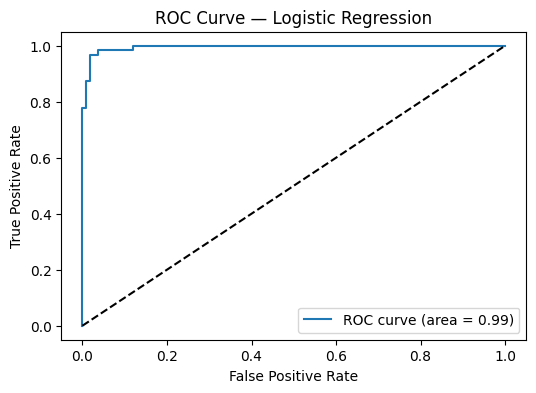

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled_f, y_train_f)

y_pred_log = log_reg.predict(X_test_scaled_f)
y_proba_log = log_reg.predict_proba(X_test_scaled_f)[:, 1]

print("Accuracy:", accuracy_score(y_test_f, y_pred_log))
print("Precision:", precision_score(y_test_f, y_pred_log))
print("Recall:", recall_score(y_test_f, y_pred_log))
print("F1 Score:", f1_score(y_test_f, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test_f, y_proba_log))

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test_f, y_proba_log)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test_f, y_proba_log):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Logistic Regression')
plt.legend()
plt.show()


## Влияние коэффициентов

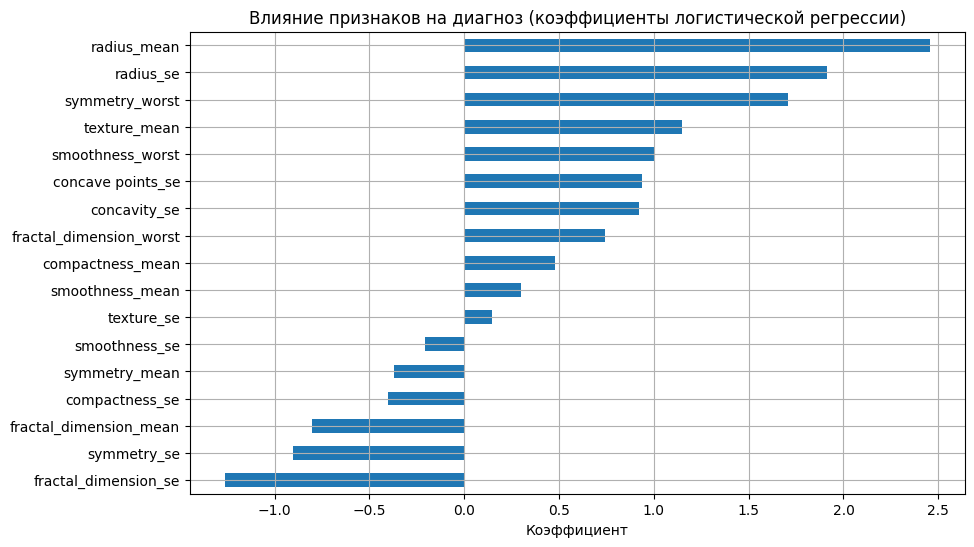

In [16]:
# Коэффициенты и признаки
coefs = pd.Series(log_reg.coef_[0], index=X_filtered.columns)

plt.figure(figsize=(10, 6))
coefs.sort_values().plot(kind='barh')
plt.title('Влияние признаков на диагноз (коэффициенты логистической регрессии)')
plt.xlabel('Коэффициент')
plt.grid(True)
plt.show()


## LogisticRegressionCV — подбор параметра C

Accuracy (CV): 0.9707602339181286
Precision (CV): 0.953125
Recall (CV): 0.9682539682539683
F1 Score (CV): 0.9606299212598425
ROC AUC (CV): 0.9955908289241623


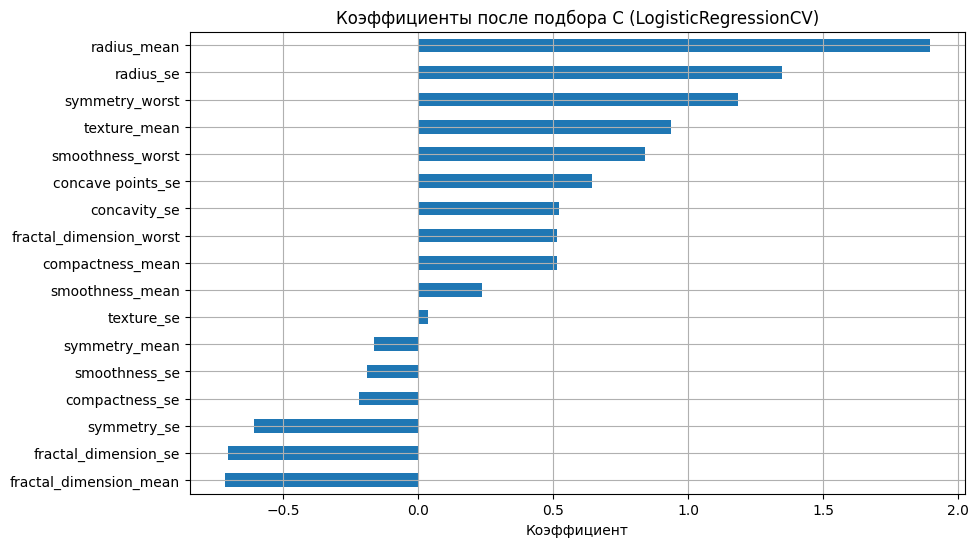

In [17]:
from sklearn.linear_model import LogisticRegressionCV

log_cv = LogisticRegressionCV(cv=5, max_iter=1000)
log_cv.fit(X_train_scaled_f, y_train_f)

y_pred_cv = log_cv.predict(X_test_scaled_f)
y_proba_cv = log_cv.predict_proba(X_test_scaled_f)[:, 1]

print("Accuracy (CV):", accuracy_score(y_test_f, y_pred_cv))
print("Precision (CV):", precision_score(y_test_f, y_pred_cv))
print("Recall (CV):", recall_score(y_test_f, y_pred_cv))
print("F1 Score (CV):", f1_score(y_test_f, y_pred_cv))
print("ROC AUC (CV):", roc_auc_score(y_test_f, y_proba_cv))

# Повторим график коэффициентов
coefs_cv = pd.Series(log_cv.coef_[0], index=X_filtered.columns)

plt.figure(figsize=(10, 6))
coefs_cv.sort_values().plot(kind='barh')
plt.title('Коэффициенты после подбора C (LogisticRegressionCV)')
plt.xlabel('Коэффициент')
plt.grid(True)
plt.show()
